In [1]:
import os
import sys

In [2]:
from maquinas.recursivelyenumerable.tm import TuringMachine as TM
from maquinas.simulation import Simulation

In [3]:
# Creating automata finito
aⁿbⁿ=TM(Q=['q_0','q_1','q_2','q_3','q_4'],
         sigma=['a','b'],
         gamma=['X','Y'],
         q_0='q_0',
         A=['q_4'],
         delta=[
            (('q_0','a'),[('q_1','X','R')]),
            (('q_1','a'),[('q_1','a','R')]),
            (('q_1','Y'),[('q_1','Y','R')]),
            (('q_1','b'),[('q_2','Y','L')]),
            (('q_2','Y'),[('q_2','Y','L')]),
            (('q_2','a'),[('q_2','a','L')]),
            (('q_2','X'),[('q_0','X','R')]),
            (('q_0','Y'),[('q_3','Y','R')]),
            (('q_3','Y'),[('q_3','Y','R')]),
            (('q_3','[B]'),[('q_4','[B]','L')]),
         ]
    )

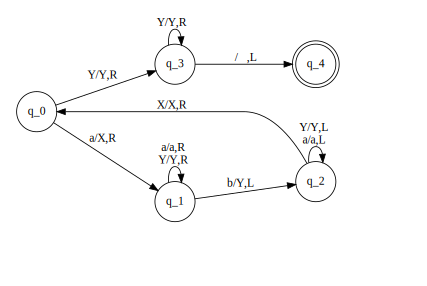

In [4]:
aⁿbⁿ.save_img("anbn",format="png")
aⁿbⁿ.graph()

In [5]:
aⁿbⁿ.save_gif("aaabbb",filename="anbn.gif",show=True)

TypeError: list indices must be integers or slices, not str

In [6]:
aⁿbⁿ.table()

,X,Y,a,b,𝖁
⟶q_0,∅,"/Y→q_3,R","/X→q_1,R",∅,∅
q_1,∅,"/Y→q_1,R","/a→q_1,R","/Y→q_2,L",∅
q_2,"/X→q_0,R","/Y→q_2,L","/a→q_2,L",∅,∅
q_3,∅,"/Y→q_3,R",∅,∅,"/𝖁→q_4,L"
q_4,∅,∅,∅,∅,∅


In [7]:
for states in aⁿbⁿ.delta_stepwise("aaabbb"):
    if states:
        print(f"⊢ {aⁿbⁿ.states2string(states)}",end="\n")
        res=states
    else:
        print("Halts")

⊢ q_0, …  _a_ aabbb …
⊢ q_1, … X _a_ abbb …
⊢ q_1, … Xa _a_ bbb …
⊢ q_1, … Xaa _b_ bb …
⊢ q_2, … Xa _a_ Ybb …
⊢ q_2, … X _a_ aYbb …
⊢ q_2, …  _X_ aaYbb …
⊢ q_0, … X _a_ aYbb …
⊢ q_1, … XX _a_ Ybb …
⊢ q_1, … XXa _Y_ bb …
⊢ q_1, … XXaY _b_ b …
⊢ q_2, … XXa _Y_ Yb …
⊢ q_2, … XX _a_ YYb …
⊢ q_2, … X _X_ aYYb …
⊢ q_0, … XX _a_ YYb …
⊢ q_1, … XXX _Y_ Yb …
⊢ q_1, … XXXY _Y_ b …
⊢ q_1, … XXXYY _b_  …
⊢ q_2, … XXXY _Y_ Y …
⊢ q_2, … XXX _Y_ YY …
⊢ q_2, … XX _X_ YYY …
⊢ q_0, … XXX _Y_ YY …
⊢ q_3, … XXXY _Y_ Y …
⊢ q_3, … XXXYY _Y_  …
⊢ q_3, … XXXYYY _𝖁_  …
⊢ q_4, … XXXYY _Y_ 𝖁 …


In [8]:
aⁿbⁿ.save_gif("aaabb",filename="anbn_reject.gif",show=True)

TypeError: list indices must be integers or slices, not str

In [9]:
# Creating automata finito
suma_uno_binario=TM(Q=['q_0','q_1','q_s','q_f'],
         sigma=['0','1','$'],
         gamma=[],
         q_0='q_0',
         A=['q_f'],
         delta=[
            (('q_0','$'),[('q_1','$','R')]),
            (('q_1','1'),[('q_1','1','R')]), 
            (('q_1','0'),[('q_1','0','R')]),
            (('q_1','[B]'),[('q_s','[B]','L')]),
            (('q_s','1'),[('q_s','0','L')]),
            (('q_s','0'),[('q_f','1','R')]),
            (('q_s','$'),[('q_f','1','R')]),
         ]
    )

In [10]:
for states in suma_uno_binario.delta_stepwise("$1000011"):
    if states:
        print(f"⊢ {suma_uno_binario.states2string(states)}",end="\n")
        res=states
    else:
        print("Halts")

⊢ q_0, …  _$_ 1000011 …
⊢ q_1, … $ _1_ 000011 …
⊢ q_1, … $1 _0_ 00011 …
⊢ q_1, … $10 _0_ 0011 …
⊢ q_1, … $100 _0_ 011 …
⊢ q_1, … $1000 _0_ 11 …
⊢ q_1, … $10000 _1_ 1 …
⊢ q_1, … $100001 _1_  …
⊢ q_1, … $1000011 _𝖁_  …
⊢ q_s, … $100001 _1_ 𝖁 …
⊢ q_s, … $10000 _1_ 0𝖁 …
⊢ q_s, … $1000 _0_ 00𝖁 …
⊢ q_f, … $10001 _0_ 0𝖁 …


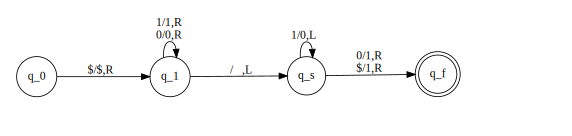

In [11]:
suma_uno_binario.graph()

In [12]:
a_n_b_m_c_nm=TM(Q=['q_0','q_1','q_2','q_3','q_4','q_5','q_6'],
         sigma=['0','1','$'],
         gamma=['X','Y'],
         q_0='q_0',
         A=['q_6'],
         delta=[
            (('q_0','a'),[('q_1','X','R')]),
            (('q_1','a'),[('q_1','a','R')]),
            (('q_1','b'),[('q_1','b','R')]),
            (('q_1','Y'),[('q_1','Y','R')]),
            (('q_1','c'),[('q_2','Y','L')]),
            (('q_2','a'),[('q_2','a','L')]),
            (('q_2','b'),[('q_2','b','L')]),
            (('q_2','Y'),[('q_2','Y','L')]),
            (('q_2','X'),[('q_0','X','R')]),
            (('q_0','b'),[('q_3','X','R')]),
            (('q_3','b'),[('q_3','b','R')]),
            (('q_3','Y'),[('q_3','Y','R')]),
            (('q_3','c'),[('q_4','Y','L')]),
            (('q_4','b'),[('q_4','b','L')]),
            (('q_4','Y'),[('q_4','Y','L')]),
            (('q_4','X'),[('q_0','X','R')]),
            (('q_0','Y'),[('q_5','Y','R')]),
            (('q_5','Y'),[('q_5','Y','R')]),
            (('q_5','[B]'),[('q_6','[B]','R')]),
            (('q_0','[B]'),[('q_6','[B]','R')]),
         ]
    )

In [19]:
for states in a_n_b_m_c_nm.delta_stepwise("bbcc"):
    if states:
        print(f"⊢ {a_n_b_m_c_nm.states2string(states)}",end="\n")
        res=states
    else:
        print("Halts")


⊢ q_0, …  _b_ bcc …
⊢ q_3, … X _b_ cc …
⊢ q_3, … Xb _c_ c …
⊢ q_4, … X _b_ Yc …
⊢ q_4, …  _X_ bYc …
⊢ q_0, … X _b_ Yc …
⊢ q_3, … XX _Y_ c …
⊢ q_3, … XXY _c_  …
⊢ q_4, … XX _Y_ Y …
⊢ q_4, … X _X_ YY …
⊢ q_0, … XX _Y_ Y …
⊢ q_5, … XXY _Y_  …
⊢ q_5, … XXYY _𝖁_  …
⊢ q_6, … XXYY𝖁 _𝖁_  …


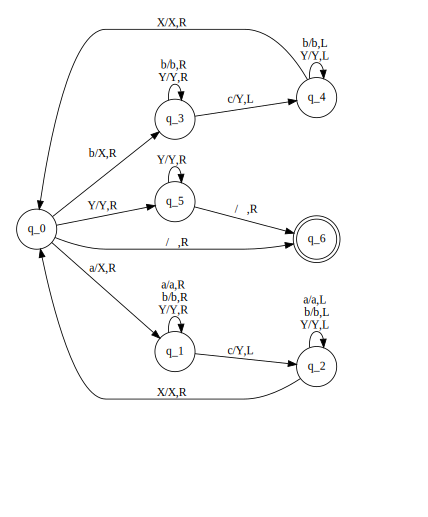

In [14]:
a_n_b_m_c_nm.graph()